In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
space_missing_data = pd.read_csv('spaceMissionFrom1957.csv')

In [34]:
space_mission_df = pd.DataFrame(space_missing_data)

In [35]:
space_mission_df.rename(columns={"Location of the Launch": "Location"}, inplace=True)

In [36]:
space_mission_df["Location"] = space_mission_df["Location"].str.split(",")

In [37]:
def get_last_item(lst):
    return lst[-1]

In [38]:
space_mission_df["Location"] = space_mission_df["Location"].apply(get_last_item)

In [39]:
space_mission_df["Location"] = space_mission_df["Location"][-1]

KeyError: -1

In [58]:
distribution_by_country = space_mission_df["Location"].value_counts()[:5]
distribution_by_country_df = pd.DataFrame(distribution_by_country)

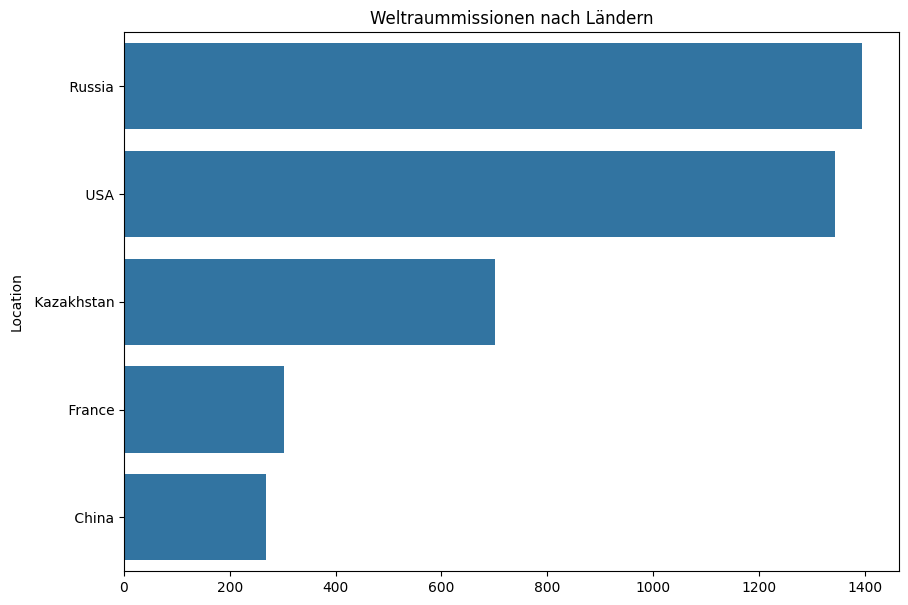

In [64]:
plt.figure(figsize=(10, 7))
sns.barplot(y="Location", x=distribution_by_country.values, data=distribution_by_country_df)
plt.title("Weltraummissionen nach Ländern")
plt.show()

In [66]:
space_mission_df

,Company Name,Location,Datum and Time of Launch,Rocket Name,Status of the rocket,Status of the mission
0,SpaceX,USA,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,CASC,China,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,SpaceX,USA,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success
3,Roscosmos,Kazakhstan,"Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,ULA,USA,"Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success
...,...,...,...,...,...,...
4319,US Navy,USA,"Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,Failure
4320,AMBA,USA,"Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,Success
4321,US Navy,USA,"Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,Failure
4322,RVSN USSR,Kazakhstan,"Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,Success


Wie hoch war die Schiterrate in Amerika und Russland

Wann war die erste Raumfahrt

Wie hat sich die Häufigkeit von den Spacemissionen enwickelt

In welchem Jahr waren die meisten Weltraummissionen